# Indian Liver Patient Prediction 

In [ ]:
# Import all required libraries for reading data, analysing and visualizing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the dataset
data= pd.read_csv("Indian Liver Patient Dataset (ILPD).csv", names=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkphos','SGPT','SGOT','Total_Proteins','Albumin','A_G_Ratio','Output'])
data.head(5)

# Observations from the dataset: This is a binary classification problem.
# 1) All the variables are numeric except gender.
# 2) There are 10 features and 1 output . 
# Value 1 = patient has liver disease and 
# Value 2 = patient does not have liver disease.

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,SGPT,SGOT,Total_Proteins,Albumin,A_G_Ratio,Output
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# Check statistical information about NUMERICAL columns in the dataset
data.describe(include='all')
#We can see that there are missing values for A/G Ratio as only 579 entries are present which indicates 4 missing values

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,SGPT,SGOT,Total_Proteins,Albumin,A_G_Ratio,Output
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


## Knowing about the each variable in the buisness level:

### Age

-> Age of a person

### Gender

-> Sex of a person (Male / Female)

### Total Bilirubin

- It is a blood test that measures the amount of billirubin present in blood.
- A small amount of bilirubin in your blood is normal.
- A high level may be a sign of liver disease.
- It is a combination of both DB IDB.
- Range = 1.71 - 20.5
- Normal level = < 5.1
- High level = > 20.5

### Direct Billirubin

- Bilirubin attached by the liver to glucuronic acid called direct billirubin.
- Range = 1.7 - 5.1
- High level = >5.1

### Alkaline Phosphotase

- It is an enzyme in a person's blood that helps break down proteins.
- Range = 115 - 460

### Alamine Aminotransferase

- It is an enzyme found primarily in the liver and kidney.
- Range 7 - 55

### Aspartate Aminotransferase

-  It is an enzyme found in cells throughout the body but mostly in the heart and liver
- Range = 6 - 40

### Total Protiens

- The total protein test measures the total amount of two classes of proteins found in the fluid portion of your blood.
- Thus both albumin and globulin.
- Range = 6 - 8.3

### ALB Albumin

- Albumin is a protein made by your liver.
- Range = 3.4 - 5.4 

### A/G Ratio

- The Albumin to Globulin ratio (A:G) is the ratio of albumin present in serum in relation to the amount of globulin.
- Normal range = Slightly over 1

## Results obtained for feature selection.

- Direct billirubin and Indirect billirubin is a combination of Total billirubin.
- So,direct billirubin column is not needed
- Total proteins consists of both Albumin and Globulin ,so albumin column is also not needed.

# Exploratory data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               583 non-null    int64  
 1   Gender            583 non-null    object 
 2   Total_Bilirubin   583 non-null    float64
 3   Direct_Bilirubin  583 non-null    float64
 4   Alkphos           583 non-null    int64  
 5   SGPT              583 non-null    int64  
 6   SGOT              583 non-null    int64  
 7   Total_Proteins    583 non-null    float64
 8   Albumin           583 non-null    float64
 9   A_G_Ratio         579 non-null    float64
 10  Output            583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
# Check for missing values
data.isnull().sum()

Age                 0
Gender              0
Total_Bilirubin     0
Direct_Bilirubin    0
Alkphos             0
SGPT                0
SGOT                0
Total_Proteins      0
Albumin             0
A_G_Ratio           4
Output              0
dtype: int64

In [6]:
#Check the rows containing missing values
missing_rows = data[data['A_G_Ratio'].isnull()]
print (missing_rows)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkphos  SGPT  SGOT  \
209   45  Female              0.9               0.3      189    23    33   
241   51    Male              0.8               0.2      230    24    46   
253   35  Female              0.6               0.2      180    12    15   
312   27    Male              1.3               0.6      106    25    54   

     Total_Proteins  Albumin  A_G_Ratio  Output  
209             6.6      3.9        NaN       1  
241             6.5      3.1        NaN       1  
253             5.2      2.7        NaN       2  
312             8.5      4.8        NaN       2  


In [7]:
data['Output'].value_counts()

1    416
2    167
Name: Output, dtype: int64

In [8]:
data['A_G_Ratio'].fillna(value=0, inplace=True) #-- replacing the nan values with 0

#data=data.dropna() #since it is a patient data and the missing values are less thgan 1% so removing them

In [9]:
data.isnull().sum()

Age                 0
Gender              0
Total_Bilirubin     0
Direct_Bilirubin    0
Alkphos             0
SGPT                0
SGOT                0
Total_Proteins      0
Albumin             0
A_G_Ratio           0
Output              0
dtype: int64

In [10]:
data.shape

(583, 11)

In [11]:
X=data.iloc[:,0:10]
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,SGPT,SGOT,Total_Proteins,Albumin,A_G_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [12]:
y=data.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Output, dtype: int64

Number of liver disease patients :  416
Number of non-liver disease patients:  167


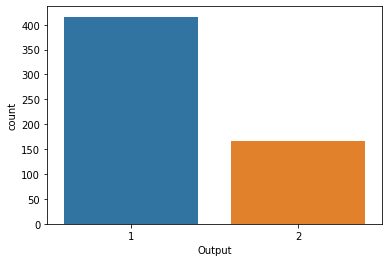

In [13]:
sns.countplot(data=data, x = 'Output', label='Count')
LD, NLD = data['Output'].value_counts()
print('Number of liver disease patients : ',LD)
print('Number of non-liver disease patients: ',NLD)

Number of Male patients:  441
Number of Female patients:  142


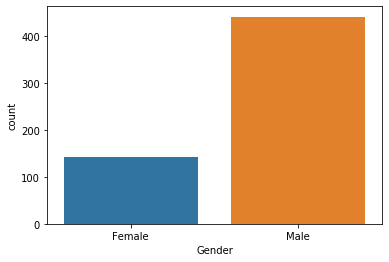

In [14]:
sns.countplot(data=data, x = 'Gender', label='Count')
M, F = data['Gender'].value_counts()
print('Number of Male patients: ',M)
print('Number of Female patients: ',F)

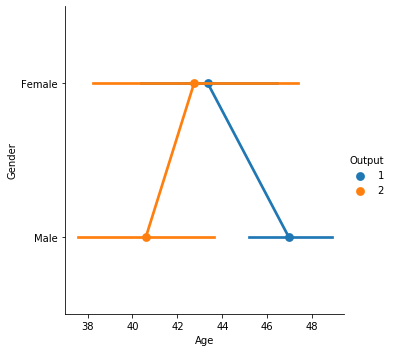

In [15]:
sns.factorplot(x="Age", y="Gender", hue="Output", data=data); 
# --- with increase in age no of patients in both genders are increasing

In [16]:
data[['Gender', 'Output','Age']].groupby(['Output','Gender'], as_index=False).mean().sort_values(by='Output', ascending=False)

,Output,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


In [17]:
data[['Gender', 'Output','Age']].groupby(['Output','Gender'], as_index=False).count().sort_values(by='Output', ascending=False)

,Output,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


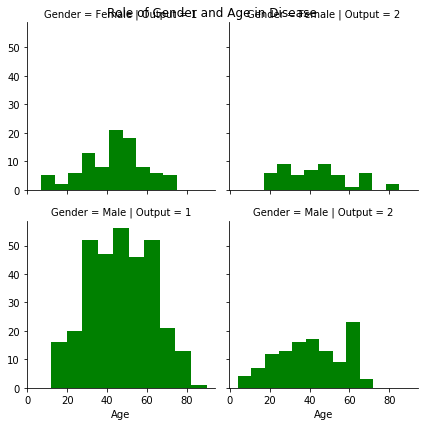

In [18]:
g = sns.FacetGrid(data, col="Output", row="Gender")
g.map(plt.hist, "Age", color="green")
plt.subplots_adjust()
g.fig.suptitle('Role of Gender and Age in Disease');

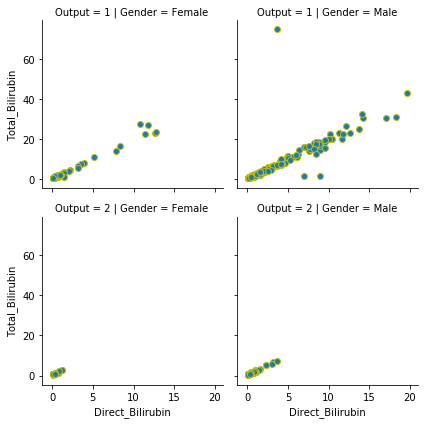

In [19]:
# Relationship between features Total Bilirubin and Direct Bilirubin
g = sns.FacetGrid(data, col="Gender", row="Output")
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="y")
plt.subplots_adjust()

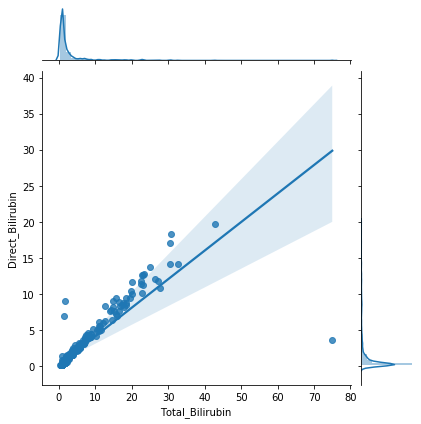

In [20]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=data, kind="reg")
#indicates linear relationship between SGOT & SGPT and the gender

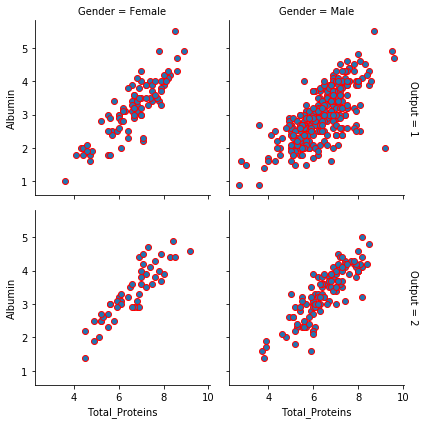

In [21]:
# Relationship between features Total Protenis and Albumin
g = sns.FacetGrid(data, col="Gender", row="Output", margin_titles=True)
g.map(plt.scatter,"Total_Proteins", "Albumin",  edgecolor="r")
plt.subplots_adjust()

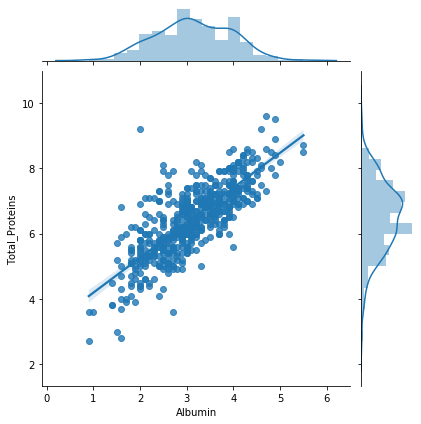

In [22]:
sns.jointplot("Albumin", "Total_Proteins", data=data, kind="reg")
#indicates linear relationship between SGOT & SGPT and the gender

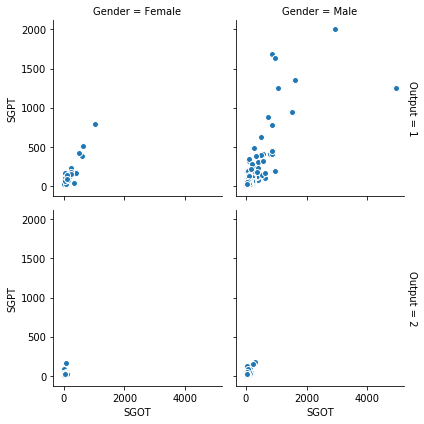

In [23]:
g = sns.FacetGrid(data, col="Gender", row="Output", margin_titles=True)
g.map(plt.scatter,"SGOT", "SGPT",  edgecolor="w")
plt.subplots_adjust()

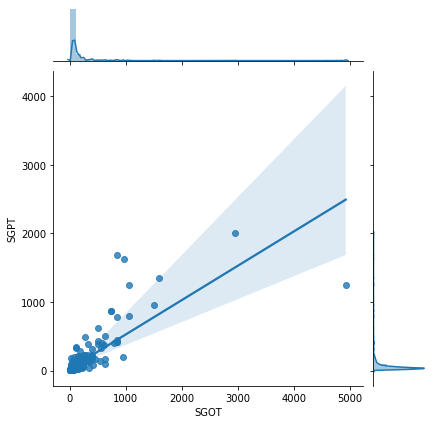

In [24]:
sns.jointplot("SGOT", "SGPT", data=data, kind="reg")
#indicates linear relationship between SGOT & SGPT and the gender

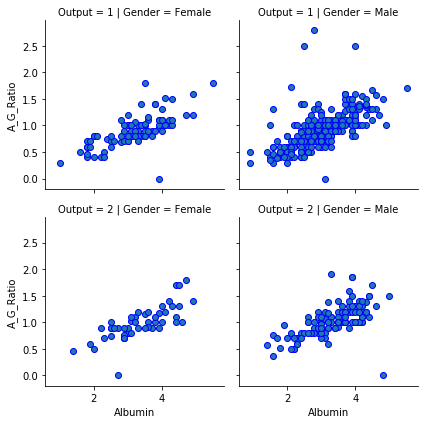

In [25]:
g = sns.FacetGrid(data, col="Gender", row="Output")
g.map(plt.scatter,"Albumin", "A_G_Ratio",  edgecolor="b")
plt.subplots_adjust()

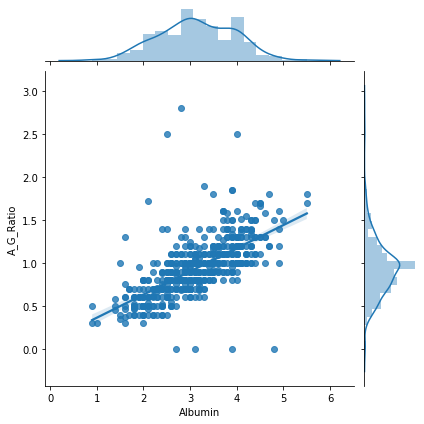

In [26]:
sns.jointplot("Albumin", "A_G_Ratio", data=data, kind="reg")
#indicates linear relationship between Albumin & A/G Ratio and the gender

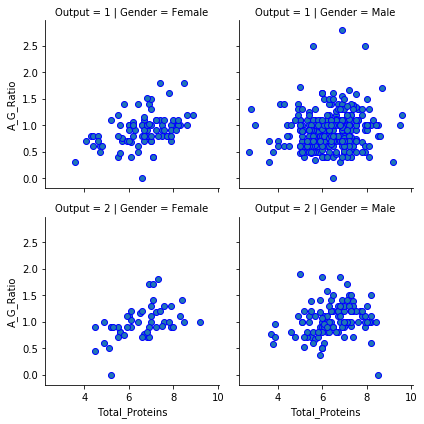

In [27]:
g = sns.FacetGrid(data, col="Gender", row="Output")
g.map(plt.scatter,"Total_Proteins", "A_G_Ratio",  edgecolor="b")
plt.subplots_adjust()

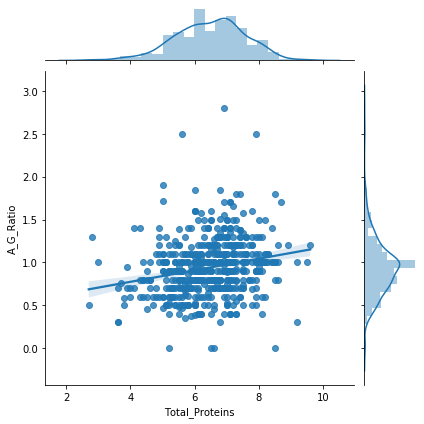

In [28]:
sns.jointplot("Total_Proteins", "A_G_Ratio", data=data, kind="reg")
#indicates non-linear relationship between Albumin & A/G Ratio and the gender


# All the ablove plots indicates direct relationship between the following features:
# Direct Bilirubin & Total Bilirubin
# SGOT & SGPT
# Total Protiens & Albumin
# A/G Ratio & Albumin
# 

In [29]:
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos,SGPT,SGOT,Total_Proteins,Albumin,A_G_Ratio,Output
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.203418,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.192539,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.186023,-0.246046
Alkphos,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.217864,-0.184866
SGPT,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,0.004184,-0.163416
SGOT,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.062993,-0.151934
Total_Proteins,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.223185,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.654450,0.161388
A_G_Ratio,-0.203418,-0.192539,-0.186023,-0.217864,0.004184,-0.062993,0.223185,0.654450,1.000000,0.148265
Output,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.148265,1.000000


Text(0.5, 1, 'Correlation between features')

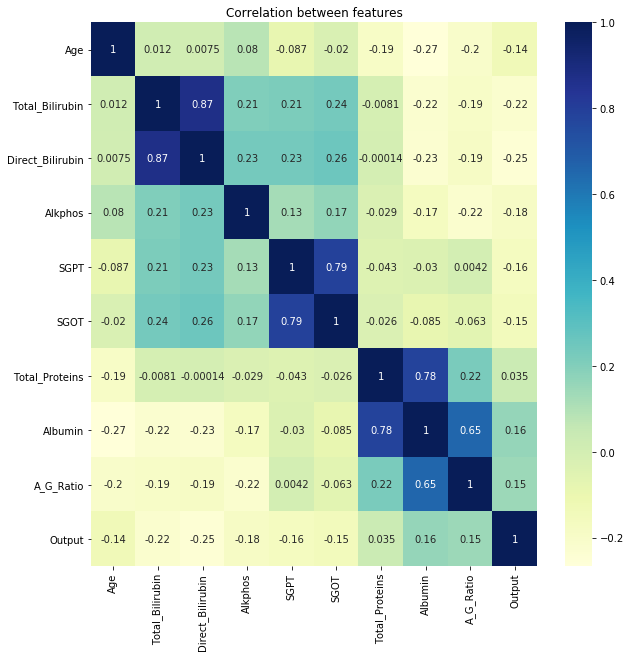

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True,
           cmap= 'YlGnBu')
plt.title('Correlation between features')

In [31]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos,SGPT,SGOT,Total_Proteins,Albumin,A_G_Ratio,Output
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.940566,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.327962,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Checking for outliers

In [32]:
data.Alkphos.sort_values(ascending=False).head()

233    2110
128    1896
429    1750
116    1630
77     1620
Name: Alkphos, dtype: int64

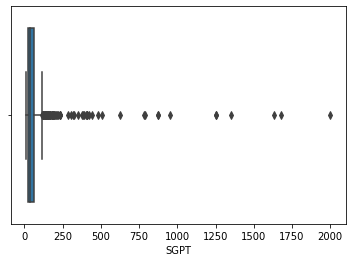

In [33]:
sns.boxplot(data.SGPT)

In [34]:
data.SGPT.sort_values(ascending=False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: SGPT, dtype: int64

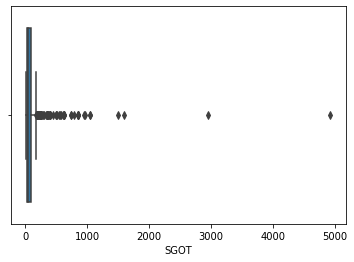

In [35]:
sns.boxplot(data.SGOT)

In [36]:
data.SGOT.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
119    1050
Name: SGOT, dtype: int64

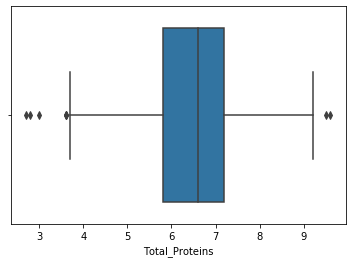

In [37]:
sns.boxplot(data.Total_Proteins)

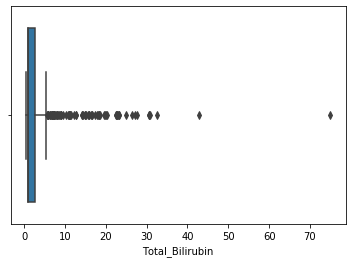

In [38]:
sns.boxplot(data.Total_Bilirubin)

In [39]:
data.Total_Bilirubin.sort_values(ascending=False).head()

166    75.0
559    42.8
505    32.6
531    30.8
259    30.5
Name: Total_Bilirubin, dtype: float64

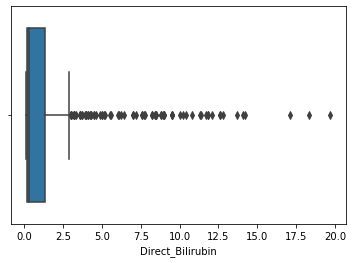

In [40]:
sns.boxplot(data.Direct_Bilirubin)

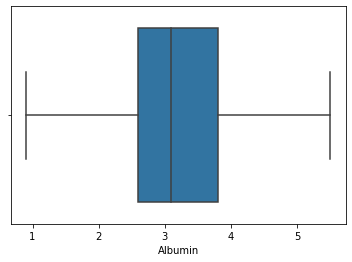

In [41]:
sns.boxplot(data.Albumin)

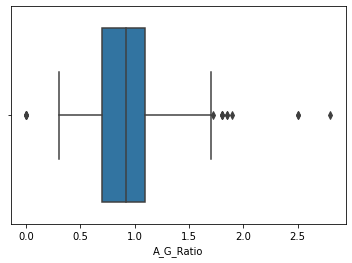

In [42]:
sns.boxplot(data.A_G_Ratio)

In [43]:
data.A_G_Ratio.sort_values(ascending=False).head()

548    2.80
572    2.50
575    2.50
215    1.90
491    1.85
Name: A_G_Ratio, dtype: float64

### Removing Outliers from SGOT column

In [44]:
data = data[data.SGOT <=3000] 
data.shape

(582, 11)

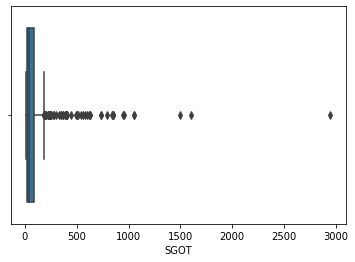

In [45]:
sns.boxplot(data.SGOT)

In [46]:
data.SGOT.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
199    1050
119    1050
Name: SGOT, dtype: int64

In [47]:
LabelEnconding= preprocessing.LabelEncoder()
LabelEnconding.fit(['Male','Female'])
data.loc[:,'Gender'] = LabelEnconding.transform(data['Gender'])

### Removing duplicate values

In [48]:
data = data.drop_duplicates()
print( data.shape ) 
#There were 13 duplicates

(569, 11)


In [49]:
X = data
y = data['Output']
print(X)
print(y)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkphos  SGPT  SGOT  \
0     65       0              0.7               0.1      187    16    18   
1     62       1             10.9               5.5      699    64   100   
2     62       1              7.3               4.1      490    60    68   
3     58       1              1.0               0.4      182    14    20   
4     72       1              3.9               2.0      195    27    59   
..   ...     ...              ...               ...      ...   ...   ...   
578   60       1              0.5               0.1      500    20    34   
579   40       1              0.6               0.1       98    35    31   
580   52       1              0.8               0.2      245    48    49   
581   31       1              1.3               0.5      184    29    32   
582   38       1              1.0               0.3      216    21    24   

     Total_Proteins  Albumin  A_G_Ratio  Output  
0               6.8      3.3       0.

### Splitting Data into Train-Test

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 10)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkphos  SGPT  SGOT  \
581   31       1              1.3               0.5      184    29    32   
309   48       0              1.1               0.7      527   178   250   
96    39       1              3.8               1.5      298   102   630   
1     62       1             10.9               5.5      699    64   100   
99    18       1              0.7               0.1      312   308   405   
..   ...     ...              ...               ...      ...   ...   ...   
383   60       0              1.4               0.7      159    10    12   
334   13       0              0.7               0.2      350    17    24   
541   42       1              0.8               0.2      198    29    19   
132   18       0              0.8               0.2      199    34    31   
279   48       0              1.0               1.4      144    18    14   

     Total_Proteins  Albumin  A_G_Ratio  Output  
581             6.8      3.4       1.

## 1. Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [52]:
Model1= RandomForestClassifier(n_estimators = 20)
Model1.fit(X_train, y_train)
y_pred1 = Model1.predict(X_test)
print("Random Forest Classifier:")
print("Accuracy:", Model1.score(X_test, y_test))
print("Precision:", precision_score(y_pred1, Model1.predict(X_test)))
print("Recall:", recall_score(y_pred1, Model1.predict(X_test)))
print("F-1 score:", f1_score(y_pred1, Model1.predict(X_test)))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test,y_pred1))

Random Forest Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0
[[82  0]
 [ 0 32]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        32

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [53]:
y_pred1

array([2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 2, 1, 2], dtype=int64)

In [54]:
y_test

185    2
567    1
388    1
384    1
433    2
      ..
202    2
443    1
413    2
337    1
276    2
Name: Output, Length: 114, dtype: int64

## 2. Logistic Regression Classifier

In [55]:
from sklearn.linear_model import LogisticRegression
Model2 = LogisticRegression(C = 0.1)
Model2.fit(X_train, y_train)
y_pred2 = Model2.predict(X_test)

In [56]:
print("Logistic Regression Classifier:")
print("Accuracy:", Model2.score(X_test, y_pred2))
print("Precision:", precision_score(y_pred2, Model2.predict(X_test)))
print("Recall:", recall_score(y_pred2, Model2.predict(X_test)))
print("F-1 score:", f1_score(y_pred2, Model2.predict(X_test)))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test,y_pred2)) #--- Seeing 3 mispredictions through confudion_matrix

Logistic Regression Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0
[[82  0]
 [ 3 29]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        82
           2       1.00      0.91      0.95        32

    accuracy                           0.97       114
   macro avg       0.98      0.95      0.97       114
weighted avg       0.97      0.97      0.97       114



In [57]:
#Metrics after Featuring scaling 
scaler= MinMaxScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)
y_predict = Model2.predict(X_test2) # -- on scaled data

In [58]:
Model2 = LogisticRegression(C = 0.1).fit(X_train2, y_train)
print("Logistic Regression Classifier:")
print("Accuracy:", Model2.score(X_test2, y_predict))
print("Precision:", precision_score(y_predict, Model2.predict(X_test2)))
print("Recall:", recall_score(y_predict, Model2.predict(X_test2)))
print("F-1 score:", f1_score(y_predict, Model2.predict(X_test2)))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test,y_predict))

Logistic Regression Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0
[[82  0]
 [ 0 32]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        32

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



## 3. Support Vector Classifier

In [59]:
from sklearn.svm import SVC
Model3= SVC(C = 0.1, kernel = 'rbf')
Model3.fit(X_train, y_train)
y_pred3 = Model3.predict(X_test)

In [60]:
print("SVM Classifier:")
print("Accuracy:", Model3.score(X_test, y_pred3))
print("Precision:", precision_score(y_pred3, Model3.predict(X_test)))
print("Recall:", recall_score(y_pred3, Model3.predict(X_test)))
print("F-1 score:", f1_score(y_pred3, Model3.predict(X_test)))
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test,y_pred3))

#Result - On Unscaled data getting all 32 mispredictions

SVM Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0
[[82  0]
 [32  0]]
              precision    recall  f1-score   support

           1       0.72      1.00      0.84        82
           2       0.00      0.00      0.00        32

    accuracy                           0.72       114
   macro avg       0.36      0.50      0.42       114
weighted avg       0.52      0.72      0.60       114



In [61]:
Model3 = SVC(C = 0.1, kernel = 'rbf').fit(X_train2, y_train)
y_predict3 = Model3.predict(X_test2) #-- on scaled data
print("SVM Classifier:")
print("Accuracy:", Model3.score(X_test2, y_predict3))
print("Precision:", precision_score(y_predict3, Model3.predict(X_test2)))
print("Recall:", recall_score(y_predict3, Model3.predict(X_test2)))
print("F-1 score:", f1_score(y_predict3, Model3.predict(X_test2)))
print(confusion_matrix(y_test, y_predict3))
print(classification_report(y_test,y_predict3))

SVM Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-1 score: 1.0
[[82  0]
 [ 0 32]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        32

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



## 4. Naives Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
Model4 = GaussianNB()
Model4.fit(X_train,y_train)
y_pred4 = Model4.predict(X_test)

In [63]:
print('Accuracy:', accuracy_score(y_test, y_pred4))
print("Recall:", recall_score(y_pred4, Model4.predict(X_test)))
print("F-1 score:", f1_score(y_pred4, Model4.predict(X_test)))
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test,y_pred4))

Accuracy: 1.0
Recall: 1.0
F-1 score: 1.0
[[82  0]
 [ 0 32]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        32

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



## 5. Neural Networks

In [64]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim=11, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_train = model.fit(X,y,validation_split=0.2, epochs=32)
model.evaluate(X,y)

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [65]:
from sklearn.metrics import roc_auc_score

test_roc_auc = roc_auc_score(y_test,y_pred4)

print('ROC AUC score of Test data : {:.3f}'.format(test_roc_auc))

ROC AUC score of Test data : 1.000


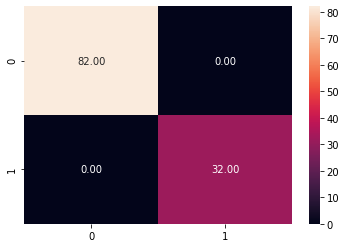

In [66]:
sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True,fmt=".2f")


### CONCLUSION: 
Random Forest and Naive Bayes works good on unscaled data but logistic regression and SVM works best after featuring scaling.
